In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [46]:
class Utilities:
    def __init__(self):
        pass
    
    def checkEmpty(self, df : pd.DataFrame):
        return len(df) - df.count()
    
    def nullIndices(self, df: pd.DataFrame):
        nullRows = df.isna()
        b = nullRows.any(axis=1)
        return b

    def showNulls(self, df: pd.DataFrame):
        nullRows = df.isna()
        b = nullRows.any(axis=1)
        return df[b]
    
    def plotValueCounts(self, df: pd.DataFrame):
        fig, ax = plt.subplots(2, df.columns.size // 2 + 1, figsize=(20,20))
        x, y = 0, 0
        
        for i, column in enumerate(df.columns):
            ax[x,y].hist(df[column])
            ax[x,y].set_title(column)
            ax[x,y].set_xlabel(column)
            ax[x,y].set_ylabel(column)

            ## Reach last index, increment and move onto next row
            if y == df.columns.size // 2:
                y = 0
                x += 1
                continue
            y += 1
        
            
    def printUniques(self, df: pd.DataFrame):
        dfNaPrint = df.astype('str')
        dfNaPrint.dtypes
        for column in dfNaPrint.columns:
            print("Column %s has to following unique values: \n%s" % (column, ','.join(dfNaPrint[column].unique())))
            print("%d in total\n\n" % (len(dfNaPrint[column].unique())))
util = Utilities()


In [7]:
df = pd.read_csv("COVID-19Surveillance_All_Data.csv", header=0)

In [9]:
df.shape

(34286, 10)

In [11]:
util.checkEmpty(df)

CATCHMENT              0
NETWORK               14
YEAR                  14
MMWR-YEAR             14
MMWR-WEEK             14
AGE CATEGORY          14
SEX                   14
RACE                  14
CUMULATIVE RATE    17150
WEEKLY RATE        17150
dtype: int64

### We are missing the network, year, MMWR-YEAR, MMWR-WEEK, AGE CATEGORY, SEX, RACE, CUMULATIVE RATE AND WEEKLY RATE for 14 rows. Let's find out what they are 

In [13]:
analysisFocus = df.loc[:, 'NETWORK':'RACE']
analysisFocus.head()

,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,SEX,RACE
0,EIP,2020.0,2020.0,10.0,Overall,Overall,Overall
1,IHSP,2020.0,2020.0,10.0,Overall,Overall,White
2,IHSP,2020.0,2020.0,10.0,Overall,Overall,Black
3,IHSP,2020.0,2020.0,10.0,Overall,Overall,Hispanic/Latino
4,IHSP,2020.0,2020.0,10.0,Overall,Overall,Asian/Pacific Islander


In [15]:
nullRows = analysisFocus.isna()
b = nullRows.any(axis=1)
df[b]


,CATCHMENT,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,SEX,RACE,CUMULATIVE RATE,WEEKLY RATE
34272,Disclaimer:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34273,The Coronavirus Disease 2019 (COVID-19)-Associ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34274,hospitalization data are preliminary and subje...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34275,"particular, case counts and rates for recent h...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34276,"received each week, prior case counts and rate...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34277,population-based surveillance for laboratory-c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34278,children (less than 18 years of age) and adult...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34279,"Emerging Infections Program (EIP) states (CA, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34280,Influenza Hospitalization Surveillance Project...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34281,"weekly unadjusted incidence rates (per 100,000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Turns out we're accidentally reading the disclaimer..... Let's filter that out. It is not important for the data analysis, at least for now

In [17]:
df = df[~b]
df.shape


(34272, 10)

### Let's look at rest of the NA values

In [69]:
util.printUniques(df.loc[:, 'CATCHMENT':'RACE'].dropna())

Column CATCHMENT has to following unique values: 
Tennessee,Utah,California,Colorado,Entire Network,Connecticut,Georgia,Iowa,Maryland,Michigan,Minnesota,New Mexico,New York,Ohio,Oregon
15 in total


Column NETWORK has to following unique values: 
EIP,IHSP,COVID-NET
3 in total


Column YEAR has to following unique values: 
2020.0
1 in total


Column MMWR_YEAR has to following unique values: 
2020.0,2021.0
2 in total


Column MMWR_WEEK has to following unique values: 
10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,1.0,2.0,3.0,4.0
48 in total


Column AGE_CATEGORY has to following unique values: 
Overall,0-4 yr,5-17 yr,18-49 yr,50-64 yr,65+ yr,65-74 yr,75-84 yr,85+,18-29 yr,30-39 yr,40-49 yr,< 18,>= 18
14 in total


Column SEX has to following unique values: 
Overall,Male,Female
3 in total


Column RACE has to followin

### For easier way to access columns, let's rename our columns to make sure they follow a convention: either <word\> or <word\>_<word\>

In [21]:
columns = df.columns
a = [column.split()[0].replace("-", "_") if len(column.split()) == 1 else '_'.join(column.split()).replace("-", "_") for column in columns]
df.columns = a
df.head()

,CATCHMENT,NETWORK,YEAR,MMWR_YEAR,MMWR_WEEK,AGE_CATEGORY,SEX,RACE,CUMULATIVE_RATE,WEEKLY_RATE
0,Tennessee,EIP,2020.0,2020.0,10.0,Overall,Overall,Overall,0.1,0.1
1,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,White,0.0,0.0
2,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,Black,0.0,0.0
3,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,Hispanic/Latino,0.0,0.0
4,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,Asian/Pacific Islander,0.0,0.0


### Let's convert MMWR_YEAR and MMWR_WEEK to Time-Series data!

### Let's take a look at the value_counts of different columns in the null categories.

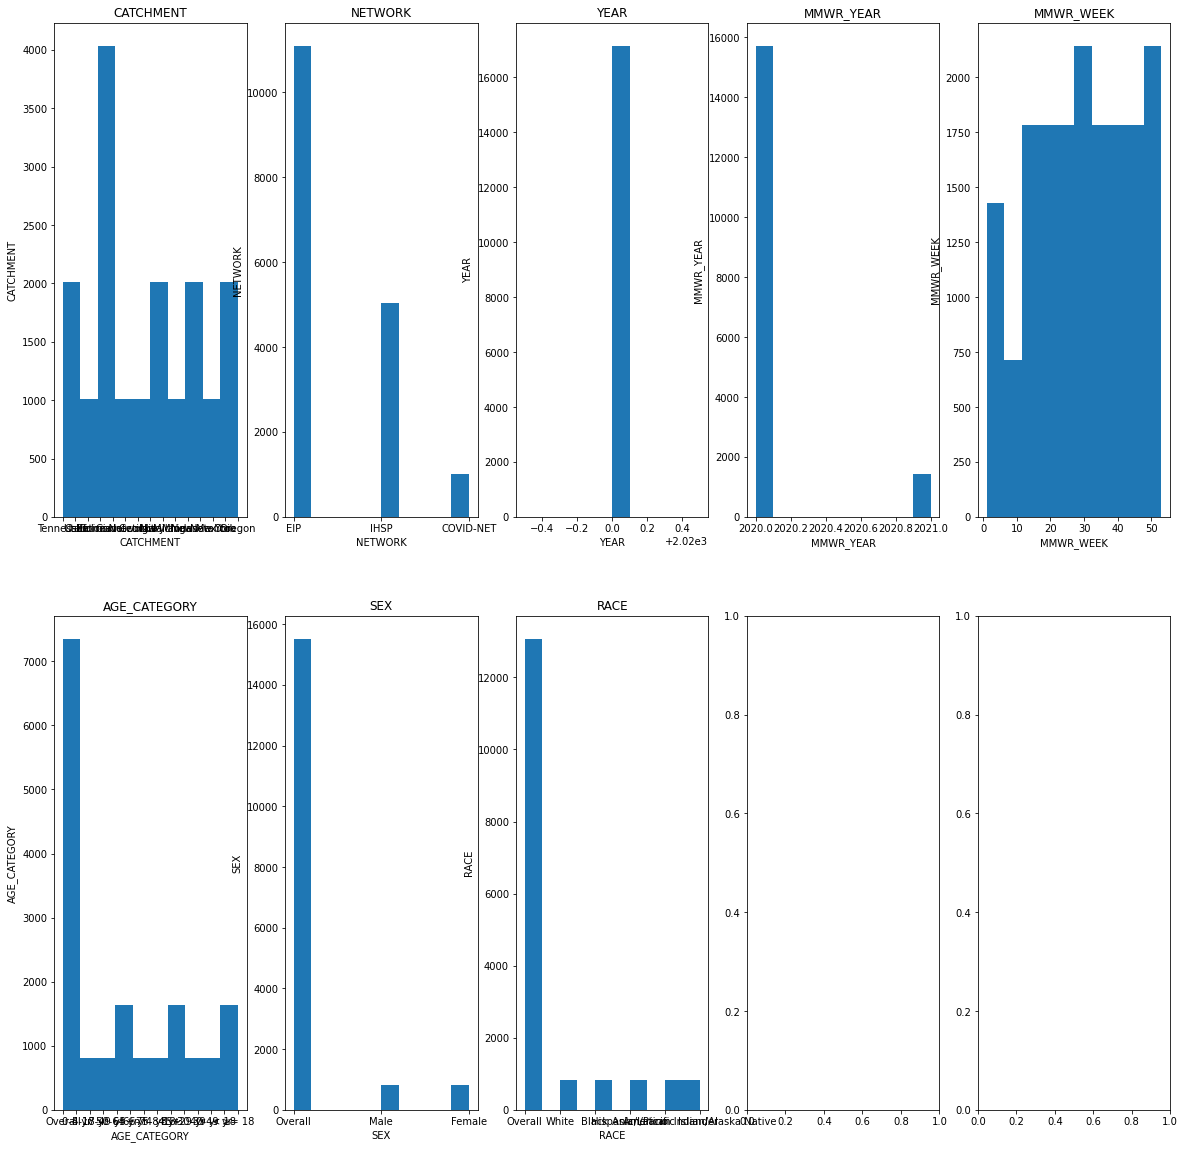

In [23]:
interest = df.loc[:, "CATCHMENT":"RACE"]
util.plotValueCounts(interest[~util.nullIndices(df)])

### Hmmm... Not good enough.... Let's try to be more specific

In [25]:
nullInterests = interest[util.nullIndices(df)]
nullInterests[["MMWR_YEAR", "MMWR_WEEK"]].value_counts().sort_index

<bound method Series.sort_index of MMWR_YEAR  MMWR_WEEK
2021.0     5.0          357
           6.0          357
           31.0         357
           32.0         357
           33.0         357
           34.0         357
           35.0         357
           36.0         357
           37.0         357
           38.0         357
           39.0         357
           40.0         357
           41.0         357
           42.0         357
           43.0         357
           44.0         357
           45.0         357
           46.0         357
           47.0         357
           48.0         357
           49.0         357
           50.0         357
           51.0         357
           30.0         357
           29.0         357
           28.0         357
           16.0         357
           7.0          357
           8.0          357
           9.0          357
           10.0         357
           11.0         357
           12.0         357
           13.0     

### Only Data On and After Week 5 of 2021 are not filled (which is the current week, which has not been completed yet), so we don't need to be concerned above to missing data at all

In [27]:
df.dropna(inplace=True)
df

,CATCHMENT,NETWORK,YEAR,MMWR_YEAR,MMWR_WEEK,AGE_CATEGORY,SEX,RACE,CUMULATIVE_RATE,WEEKLY_RATE
0,Tennessee,EIP,2020.0,2020.0,10.0,Overall,Overall,Overall,0.1,0.1
1,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,White,0.0,0.0
2,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,Black,0.0,0.0
3,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,Hispanic/Latino,0.0,0.0
4,Utah,IHSP,2020.0,2020.0,10.0,Overall,Overall,Asian/Pacific Islander,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
33451,Colorado,EIP,2020.0,2021.0,4.0,>= 18,Overall,Overall,549.9,7.3
33452,Entire Network,COVID-NET,2020.0,2021.0,4.0,>= 18,Overall,Overall,526.8,9.5
33453,Connecticut,EIP,2020.0,2021.0,4.0,>= 18,Overall,Overall,790.7,19.2
33454,Entire Network,EIP,2020.0,2021.0,4.0,>= 18,Overall,Overall,549.1,10.2


## General Observations

Let's try to get a general overview of the dataset. These are the steps we will follow:

1. Find correalations between Rates vs. MMWR_YEAR, Age, Race and other variables.
2. Make a model based on these variables. 

In [29]:
df.describe()

,YEAR,MMWR_YEAR,MMWR_WEEK,CUMULATIVE_RATE,WEEKLY_RATE
count,17136.0,17136.000000,17136.000000,17136.000000,17136.000000
mean,2020.0,2020.083333,29.083333,223.478793,11.786210
std,0.0,0.276393,14.566129,337.087886,20.652756
min,2020.0,2020.000000,1.000000,0.000000,0.000000
25%,2020.0,2020.000000,17.750000,23.500000,1.400000
50%,2020.0,2020.000000,29.500000,110.600000,5.300000
75%,2020.0,2020.000000,41.250000,280.325000,13.300000
max,2020.0,2021.000000,53.000000,3895.200000,328.400000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17136 entries, 0 to 33455
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CATCHMENT        17136 non-null  object 
 1   NETWORK          17136 non-null  object 
 2   YEAR             17136 non-null  float64
 3   MMWR_YEAR        17136 non-null  float64
 4   MMWR_WEEK        17136 non-null  float64
 5   AGE_CATEGORY     17136 non-null  object 
 6   SEX              17136 non-null  object 
 7   RACE             17136 non-null  object 
 8   CUMULATIVE_RATE  17136 non-null  float64
 9   WEEKLY_RATE      17136 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [47]:
util.printUniques(df.loc[:, "CATCHMENT":"RACE"])

Column CATCHMENT has to following unique values: 
Tennessee,Utah,California,Colorado,Entire Network,Connecticut,Georgia,Iowa,Maryland,Michigan,Minnesota,New Mexico,New York,Ohio,Oregon
15 in total


Column NETWORK has to following unique values: 
EIP,IHSP,COVID-NET
3 in total


Column YEAR has to following unique values: 
2020.0
1 in total


Column MMWR_YEAR has to following unique values: 
2020.0,2021.0
2 in total


Column MMWR_WEEK has to following unique values: 
10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,1.0,2.0,3.0,4.0
48 in total


Column AGE_CATEGORY has to following unique values: 
Overall,0-4 yr,5-17 yr,18-49 yr,50-64 yr,65+ yr,65-74 yr,75-84 yr,85+,18-29 yr,30-39 yr,40-49 yr,< 18,>= 18
14 in total


Column SEX has to following unique values: 
Overall,Male,Female
3 in total


Column RACE has to followin

In [35]:
df.value_counts()

CATCHMENT       NETWORK  YEAR    MMWR_YEAR  MMWR_WEEK  AGE_CATEGORY  SEX      RACE     CUMULATIVE_RATE  WEEKLY_RATE
California      EIP      2020.0  2020.0     10.0       0-4 yr        Overall  Overall  0.0              0.0            1
New Mexico      EIP      2020.0  2020.0     26.0       5-17 yr       Overall  Overall  1.4              0.5            1
                                            25.0       >= 18         Overall  Overall  67.4             3.0            1
                                                       Overall       Female   Overall  56.3             2.0            1
                                                                     Male     Overall  49.3             2.7            1
                                                                                                                      ..
Entire Network  IHSP     2020.0  2020.0     42.0       5-17 yr       Overall  Overall  9.6              0.4            1
                                     

### Every Entry is Unique. Worth Noting :DD

In [51]:
df[['SEX', 'WEEKLY_RATE', "CATCHMENT", "AGE_CATEGORY", 'RACE']].groupby(['SEX', 'AGE_CATEGORY', 'RACE']).mean()

WEEKLY_RATE
SEX     AGE_CATEGORY RACE                                      
Female  Overall      Overall                           8.327451
Male    Overall      Overall                           8.980515
Overall 0-4 yr       Overall                           0.788725
        18-29 yr     Overall                           2.982475
        18-49 yr     Overall                           4.787010
        30-39 yr     Overall                           4.934069
        40-49 yr     Overall                           7.150858
        5-17 yr      Overall                           0.474387
        50-64 yr     Overall                          12.388113
        65+ yr       Overall                          27.324142
        65-74 yr     Overall                          19.550980
        75-84 yr     Overall                          34.471446
        85+          Overall                          49.413358
        < 18         Overall                           0.557475
        >= 18        Overall                          10.942525
        Overall      American Indian/Alaska Native     9.694118
                     Asian/Pacific Islander            6.530147
                     Black                            11.914461
                     Hispanic/Latino                  11.410539
                     Overall                           8.648897
                     White                             6.238725

In [67]:
df[['SEX', 'WEEKLY_RATE', "CATCHMENT", "AGE_CATEGORY", 'RACE']].groupby(['SEX', 'AGE_CATEGORY', 'RACE']).mean()

WEEKLY_RATE
SEX     AGE_CATEGORY RACE                                      
Female  Overall      Overall                           8.327451
Male    Overall      Overall                           8.980515
Overall 0-4 yr       Overall                           0.788725
        18-29 yr     Overall                           2.982475
        18-49 yr     Overall                           4.787010
        30-39 yr     Overall                           4.934069
        40-49 yr     Overall                           7.150858
        5-17 yr      Overall                           0.474387
        50-64 yr     Overall                          12.388113
        65+ yr       Overall                          27.324142
        65-74 yr     Overall                          19.550980
        75-84 yr     Overall                          34.471446
        85+          Overall                          49.413358
        < 18         Overall                           0.557475
        >= 18        Overall                          10.942525
        Overall      American Indian/Alaska Native     9.694118
                     Asian/Pacific Islander            6.530147
                     Black                            11.914461
                     Hispanic/Latino                  11.410539
                     Overall                           8.648897
                     White                             6.238725

In [68]:
interest = df[['MMWR_WEEK', 'SEX', 'WEEKLY_RATE', "AGE_CATEGORY", 'RACE']].groupby(['SEX', 'AGE_CATEGORY', 'MMWR_WEEK', 'RACE']).mean()
interest ## Expecting 21*48 combos

WEEKLY_RATE
SEX     AGE_CATEGORY MMWR_WEEK RACE                               
Female  Overall      1.0       Overall                   16.247059
                     2.0       Overall                   14.300000
                     3.0       Overall                   11.505882
                     4.0       Overall                    7.141176
                     10.0      Overall                    0.076471
...                                                            ...
Overall Overall      53.0      Asian/Pacific Islander     8.211765
                               Black                     18.847059
                               Hispanic/Latino           17.000000
                               Overall                   16.641176
                               White                     13.888235

[1008 rows x 1 columns]

### It is a perfect dataset....

In [ ]:
df